<a href="https://colab.research.google.com/github/taimayh/CognoRise-Infotech/blob/main/MOVIE_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

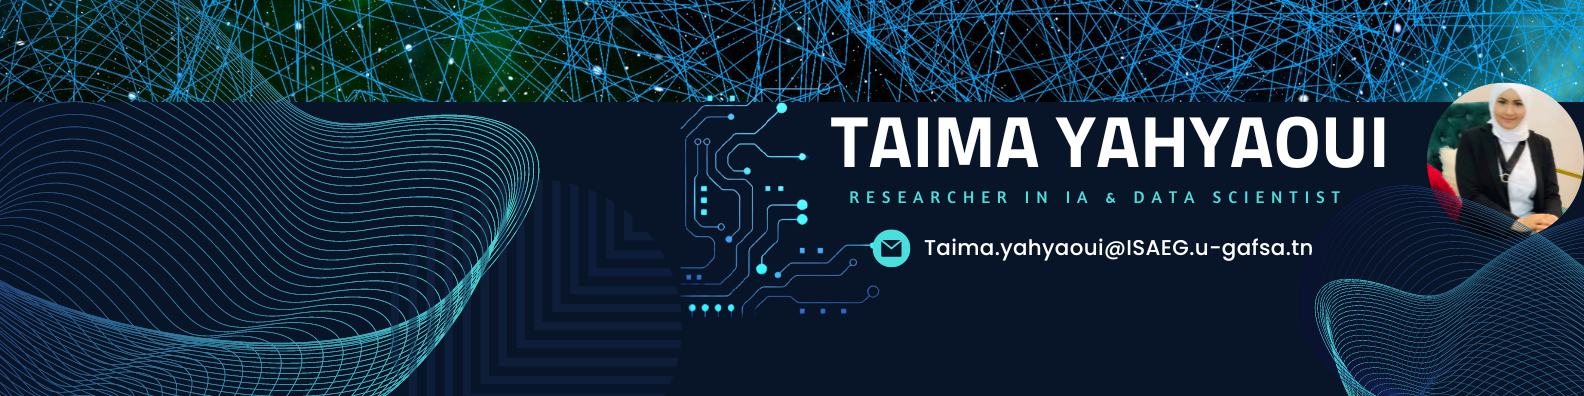

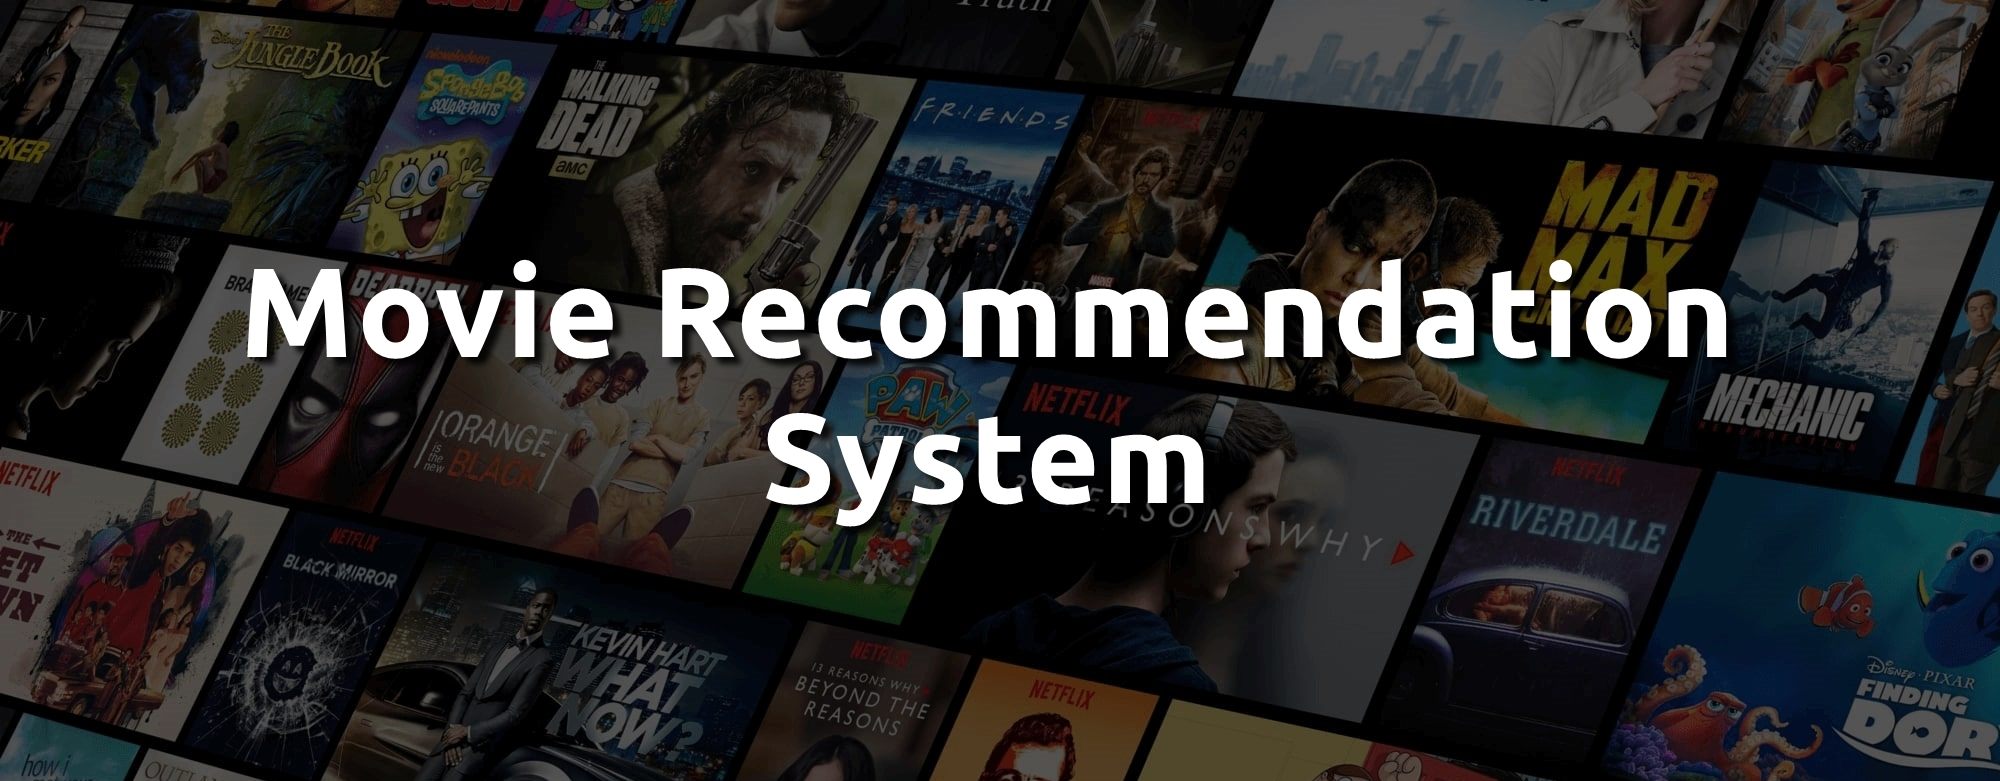

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
# Defining the function to display the boxplot and histogram graphs
def hist_box_plot(df, column, height=15, width=5):
    fig, axes = plt.subplots(1, 2, figsize=(height, width))
    sns.histplot(ax=axes[0], data = df[column]);
    axes[0].set_title(f'Histogram for {column}')
    sns.boxplot(ax=axes[1], data = df[column]);
    axes[1].set_title(f'Boxplot for {column}')
    plt.show();

In [3]:
# Access the Drive from Colab, for accessing the file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Reading the Dataset
movie_data= pd.read_csv('/content/drive/MyDrive/Stage/1)ML intern 10 avril to 10mai/TASK2/IMDB Dataset.csv')
movie_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# How a review looks like
movie_data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [7]:
# Checking the distribution of sentiment column
movie_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<ipython-input-9-6d23d44ba369>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=movie_data, palette='Set2')


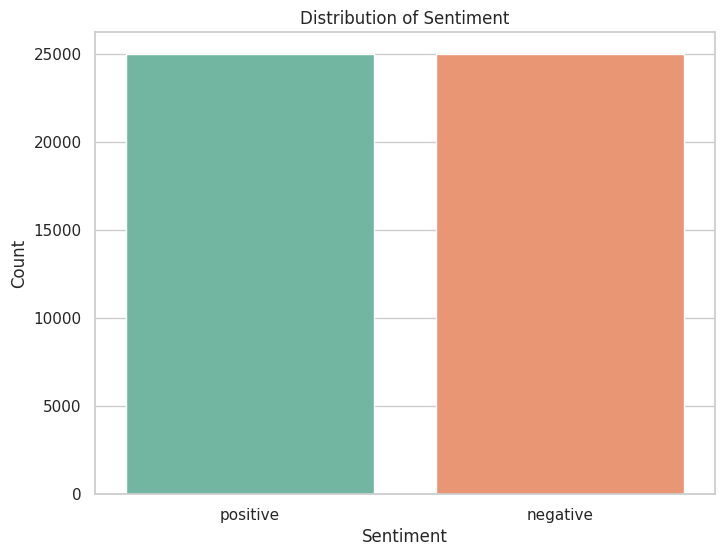

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df['sentiment'] contains 'positive' and 'negative' labels

# Plotting the distribution of sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=movie_data, palette='Set2')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


<ipython-input-12-01601a575ee9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['No Duplicates', 'Duplicates'], y=[len(movie_data) - duplicate_counts, duplicate_counts], palette='Set2')


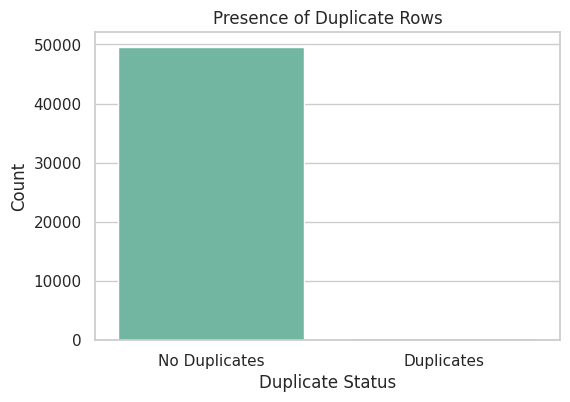

In [12]:

# Counting duplicate rows
duplicate_counts = movie_data.duplicated().sum()

# Plotting the presence of duplicate rows
plt.figure(figsize=(6, 4))
sns.barplot(x=['No Duplicates', 'Duplicates'], y=[len(movie_data) - duplicate_counts, duplicate_counts], palette='Set2')
plt.title('Presence of Duplicate Rows')
plt.xlabel('Duplicate Status')
plt.ylabel('Count')
plt.show()


In [13]:
# Dropping the duplicate rows
movie_data.drop_duplicates(inplace=True)

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None
No numerical columns found.


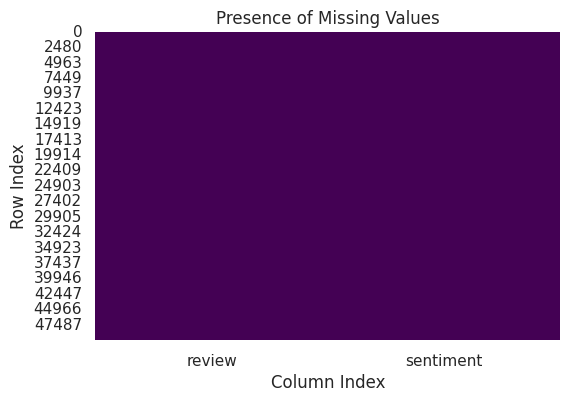

<ipython-input-14-5113a00e3cd5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['No Duplicates', 'Duplicates'], y=[len(movie_data) - duplicate_counts, duplicate_counts], palette='Set2')


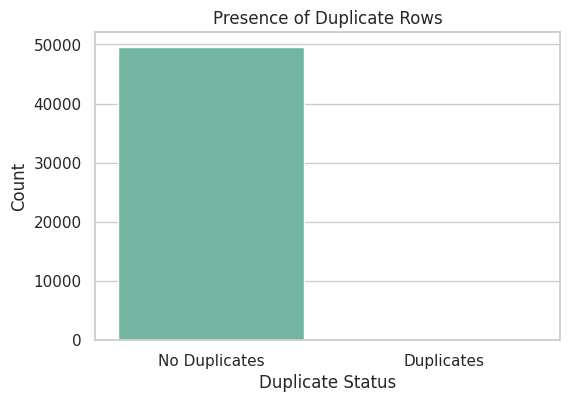

In [14]:
# Displaying basic information about the DataFrame
print("Data Information:")
print(movie_data.info())

# Plotting the distribution of numerical features (if applicable)
numeric_columns = movie_data.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_columns) > 0:
    plt.figure(figsize=(10, 6))
    for col in numeric_columns:
        sns.histplot(movie_data[col], kde=True, bins=20)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
else:
    print("No numerical columns found.")

# Plotting the presence of missing values
plt.figure(figsize=(6, 4))
sns.heatmap(movie_data.isnull(), cbar=False, cmap='viridis')
plt.title('Presence of Missing Values')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

# Plotting the presence of duplicate rows
duplicate_counts = movie_data.duplicated().sum()
plt.figure(figsize=(6, 4))
sns.barplot(x=['No Duplicates', 'Duplicates'], y=[len(movie_data) - duplicate_counts, duplicate_counts], palette='Set2')
plt.title('Presence of Duplicate Rows')
plt.xlabel('Duplicate Status')
plt.ylabel('Count')
plt.show()


Data preprocessing

In [21]:
# Lowercasing
movie_data['review'] =  movie_data['review'].str.lower()
movie_data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [22]:
# Removing html tags
def remove_html_tags(text):
    return re.sub(re.compile("<.*?>"), '', text)

movie_data['review'] = movie_data['review'].apply(remove_html_tags)

movie_data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [24]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
# Download the NLTK stopwords corpus
!python -m nltk.downloader stopwords

# Removing stopwords
stopwords_list = stopwords.words('english')

movie_data['review'] = movie_data['review'].apply(lambda x: [item for item in x.split() if item not in stopwords_list]).apply(lambda x: " ".join(x))

movie_data.head()

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


In [26]:
# Splitting dataframe in features and target variable
X = movie_data['review']
y = movie_data['sentiment']

In [27]:
X

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production. filming technique...
2        thought wonderful way spend time hot summer we...
3        basically there's family little boy (jake) thi...
4        petter mattei's "love time money" visually stu...
                               ...                        
49995    thought movie right good job. creative origina...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    catholic taught parochial elementary schools n...
49998    i'm going disagree previous comment side malti...
49999    one expects star trek movies high art, fans ex...
Name: review, Length: 49582, dtype: object

In [28]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 49582, dtype: object

In [29]:
# Encoding the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
X_train.shape, X_test.shape

((39665,), (9917,))

Text Vectorization

Bag of Words

In [32]:
# Applying Bag of Words on the text
cv = CountVectorizer(max_features=3000)
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

In [33]:
X_train_bow.shape

(39665, 3000)

Modelling

In [34]:
# Trying multinomial naive bayes
mnb = MultinomialNB()
mnb.fit(X_train_bow, y_train)

MultinomialNB()

In [35]:
y_pred = mnb.predict(X_test_bow)
accuracy_score(y_test, y_pred)

0.8444085913078552

In [36]:
confusion_matrix(y_test, y_pred)

array([[4228,  805],
       [ 738, 4146]])

In [37]:
# Trying random forest
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)

y_pred = rf.predict(X_test_bow)
accuracy_score(y_test, y_pred)

0.8436018957345972

In [38]:
confusion_matrix(y_test, y_pred)

array([[4251,  782],
       [ 769, 4115]])

n-grams

In [39]:
# Applying n-grams on the text
cv = CountVectorizer(ngram_range=(1,2), max_features=5000)
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

In [40]:
mnb = MultinomialNB()
mnb.fit(X_train_bow, y_train)

y_pred = mnb.predict(X_test_bow)
accuracy_score(y_test, y_pred)

0.8523747100937784

Tf-Idf

In [41]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [42]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

y_pred = mnb.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.8540889381869518

In [43]:
confusion_matrix(y_test, y_pred)

array([[4224,  809],
       [ 638, 4246]])

**2éme méthode**

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Preprocess the text data (e.g., remove stopwords, punctuation, etc.)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( movie_data['review'],  movie_data['sentiment'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8954320863164263


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Preprocess the text data (e.g., remove stopwords, punctuation, etc.)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(movie_data['review'], movie_data['sentiment'], test_size=0.2)

# Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7195724513461732


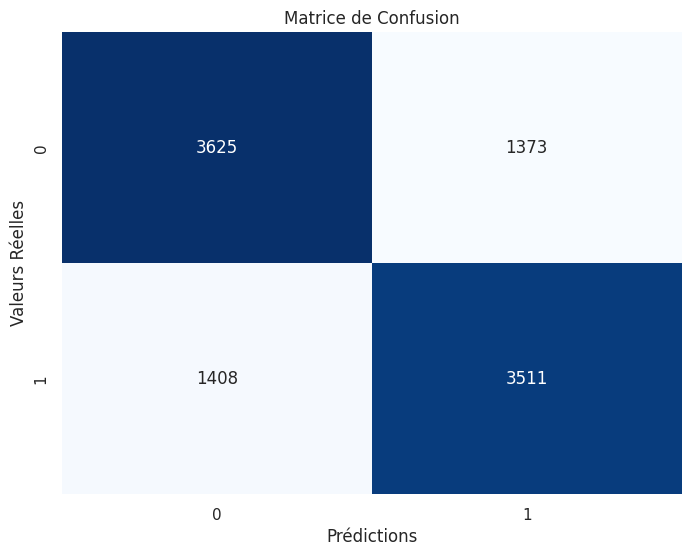

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion en couleur avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()


In [52]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162997 sha256=71c80617c349bd243fc49223a47e9477b86086a3afc1a72149f38fa9e3dc3408
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
